# Residential Power Usage Time Series 

### Name : Kanyarat Suwannama 

#### UNI ID: ks4002 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the data 
usage = pd.read_csv('power_usage_2016_to_2020.csv')

In [3]:
# Prints information about the DataFrame 
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [4]:
usage

StartDate  Value (kWh)  day_of_week    notes
0      2016-01-06 00:00:00        1.057            2  weekday
1      2016-01-06 01:00:00        1.171            2  weekday
2      2016-01-06 02:00:00        0.560            2  weekday
3      2016-01-06 03:00:00        0.828            2  weekday
4      2016-01-06 04:00:00        0.932            2  weekday
...                    ...          ...          ...      ...
35947  2020-07-07 19:00:00        1.307            1  weekday
35948  2020-07-07 20:00:00        2.872            1  weekday
35949  2020-07-07 21:00:00        2.138            1  weekday
35950  2020-07-07 22:00:00        2.199            1  weekday
35951  2020-07-07 23:00:00        1.809            1  weekday

[35952 rows x 4 columns]

In [5]:
# Find duplicated values in the dataset
usage.duplicated().sum()

0

In [6]:
# Returns description of the data in the dataframe
usage.describe()

Value (kWh)   day_of_week
count  35952.000000  35952.000000
mean       0.891631      2.997330
std        0.908133      1.999024
min        0.064000      0.000000
25%        0.323750      1.000000
50%        0.501000      3.000000
75%        1.072000      5.000000
max        6.446000      6.000000

In [7]:
# Extract Data Feature
usage['Date'] = pd.to_datetime(usage["StartDate"]).dt.date
usage['Date'] = pd.to_datetime(usage['Date'])
# Extract Time Series
usage['time'] = pd.to_datetime(usage["StartDate"]).dt.time
usage.drop('StartDate' , axis =1, inplace= True)
usage.drop('day_of_week' , axis =1, inplace= True)
usage.head()

Value (kWh)    notes       Date      time
0        1.057  weekday 2016-01-06  00:00:00
1        1.171  weekday 2016-01-06  01:00:00
2        0.560  weekday 2016-01-06  02:00:00
3        0.828  weekday 2016-01-06  03:00:00
4        0.932  weekday 2016-01-06  04:00:00

In [8]:
# The power usage is highly correlated to date and value(kWh)
usage = usage[['Date','Value (kWh)']]
usage.columns = ['ds','y']
usage.tail()

ds      y
35947 2020-07-07  1.307
35948 2020-07-07  2.872
35949 2020-07-07  2.138
35950 2020-07-07  2.199
35951 2020-07-07  1.809

### Simple Moving Average 

<AxesSubplot:>

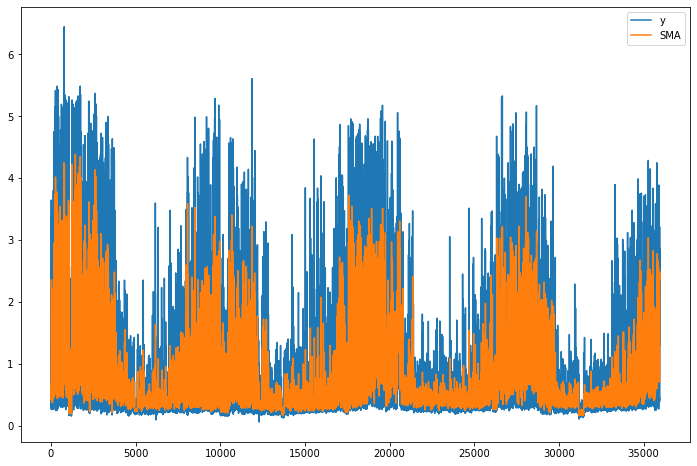

In [7]:
usage['SMA'] = usage.iloc[:,1].rolling(window=10).mean()
usage['diff'] = usage['y'] - usage['SMA']

# Plot the differences between the actual and the simple moving average
usage[['y','SMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'The distribution of diff')

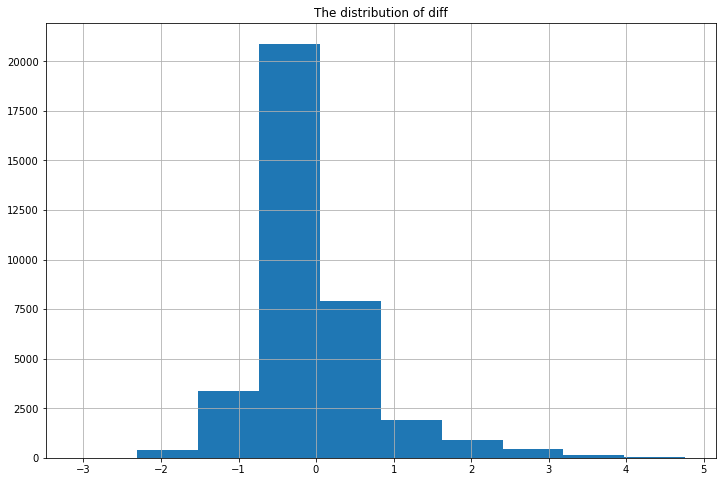

In [8]:
# Plot the distribution of the differences
usage['diff'].hist(figsize=(12,8))
plt.title('The distribution of diff')

In [9]:
# Calculate the differences between the actual and the simple moving average
usage['upper'] = usage['SMA'] + 2
usage['lower'] = usage['SMA'] - 2
usage[10:20]

ds      y     SMA    diff   upper   lower
10 2016-01-06  0.273  0.5671 -0.2941  2.5671 -1.4329
11 2016-01-06  0.723  0.5223  0.2007  2.5223 -1.4777
12 2016-01-06  0.426  0.5089 -0.0829  2.5089 -1.4911
13 2016-01-06  0.421  0.4682 -0.0472  2.4682 -1.5318
14 2016-01-06  0.447  0.4197  0.0273  2.4197 -1.5803
15 2016-01-06  0.496  0.4360  0.0600  2.4360 -1.5640
16 2016-01-06  0.523  0.4421  0.0809  2.4421 -1.5579
17 2016-01-06  3.647  0.7575  2.8895  2.7575 -1.2425
18 2016-01-06  3.018  1.0268  1.9912  3.0268 -0.9732
19 2016-01-06  3.326  1.3300  1.9960  3.3300 -0.6700

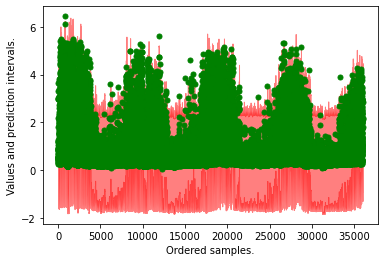

In [11]:
# The code below plots the tolerance band and has revealed the outliers
def plot_it():
    plt.plot(usage['y'],'go',markersize=5,label='Actual')
    plt.fill_between(
       np.arange(usage.shape[0]), usage['lower'], usage['upper'], alpha=0.5, color="r", label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    plt.show()
    
plot_it()

### Exponential Smoothing

<AxesSubplot:>

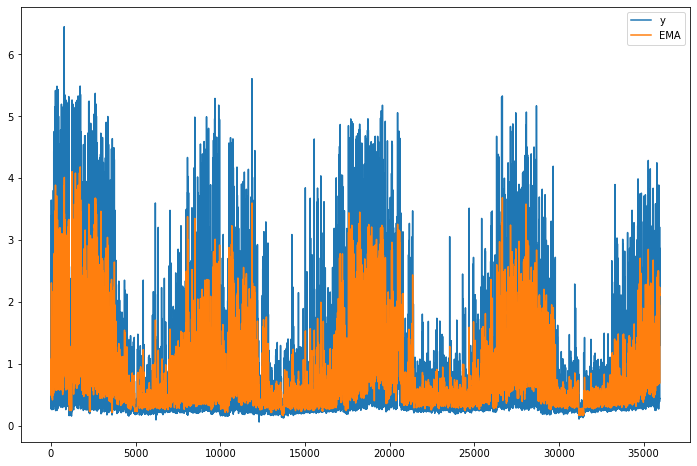

In [10]:
from statsmodels.tsa.api import SimpleExpSmoothing
EMAfit = SimpleExpSmoothing(usage['y']).fit(smoothing_level=0.2,optimized=False)
EMA = EMAfit.forecast(3).rename(r'$\alpha=0.2$')
usage['EMA'] = EMAfit.predict(start = 0)
usage['diff'] = usage['y'] - usage['EMA']

# Plot the differences between the actual and the EMA
usage[['y','EMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'The distribution of diff')

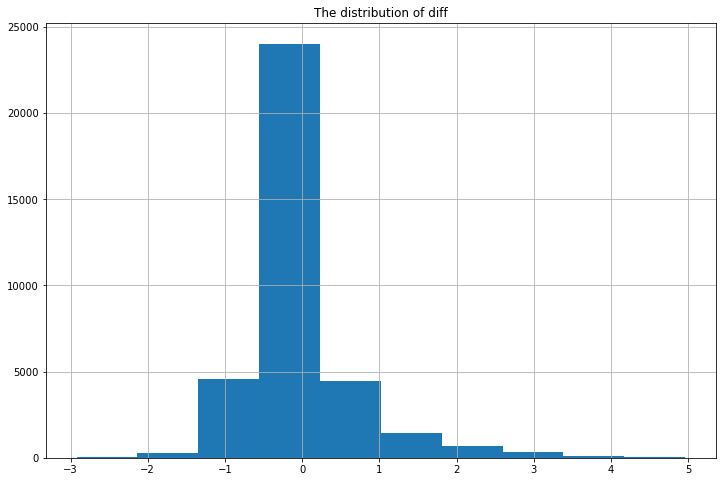

In [12]:
# Plot the distribution of the differences
usage['diff'].hist(figsize=(12,8))
plt.title('The distribution of diff')

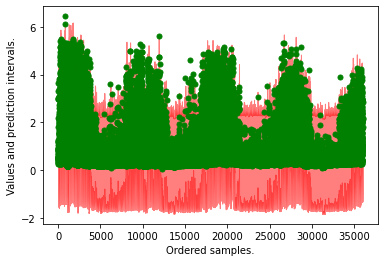

In [15]:
# Calculate the differences between the actual and the simple moving average. 
usage['upper'] = usage['EMA'] + 2
usage['lower'] = usage['EMA'] - 2
plot_it()

### Seasonal-Trend Decomposition

In [18]:
import pandas as pd
import statsmodels.api as sm
usage = pd.read_csv('power_usage_2016_to_2020.csv')

In [19]:
# Extract Data Feature
usage['Date'] = pd.to_datetime(usage["StartDate"]).dt.date
usage['Date'] = pd.to_datetime(usage['Date'])
# Extract Time Series
usage['time'] = pd.to_datetime(usage["StartDate"]).dt.time
usage.drop('StartDate' , axis =1, inplace= True)
usage.drop('day_of_week' , axis =1, inplace= True)
usage.head()

Value (kWh)    notes       Date      time
0        1.057  weekday 2016-01-06  00:00:00
1        1.171  weekday 2016-01-06  01:00:00
2        0.560  weekday 2016-01-06  02:00:00
3        0.828  weekday 2016-01-06  03:00:00
4        0.932  weekday 2016-01-06  04:00:00

In [20]:
# Combine the value(kWh) based on the date 
usage1 = usage.groupby('Date', as_index=False).sum()

In [18]:
usage1

Date  Value (kWh)
0    2016-01-06       29.691
1    2016-01-07       43.177
2    2016-01-08       50.057
3    2016-01-09       47.363
4    2016-01-10       42.203
...         ...          ...
1493 2020-12-02       12.087
1494 2020-12-03       16.130
1495 2020-12-04       18.011
1496 2020-12-05       15.777
1497 2020-12-06       34.504

[1498 rows x 2 columns]

In [19]:
usage1 = usage1[['Date','Value (kWh)']]
usage1.columns = ['ds','y']

In [21]:
import statsmodels.api as sm
usage1 = usage1.reset_index(drop='index') #inplace=True)
usage1.index = pd.to_datetime(usage1['ds'])

In [22]:
usage1

ds       y
ds                           
2016-01-06 2016-01-06  29.691
2016-01-07 2016-01-07  43.177
2016-01-08 2016-01-08  50.057
2016-01-09 2016-01-09  47.363
2016-01-10 2016-01-10  42.203
...               ...     ...
2020-12-02 2020-12-02  12.087
2020-12-03 2020-12-03  16.130
2020-12-04 2020-12-04  18.011
2020-12-05 2020-12-05  15.777
2020-12-06 2020-12-06  34.504

[1498 rows x 2 columns]

In [24]:
# Convert TimeSeries to calendar day frequency
usage2 = usage1[['ds','y']].set_index('ds').asfreq('D')
usage2.index

DatetimeIndex(['2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09',
               '2016-01-10', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06'],
              dtype='datetime64[ns]', name='ds', length=1797, freq='D')

In [25]:
# Replace NA values forward and backward filling
usage2 = usage2.fillna(method='bfill').fillna(method='ffill')

In [26]:
# Let me print each of the three components.
result = sm.tsa.seasonal_decompose(usage2['y'], model='additive')

<AxesSubplot:xlabel='ds'>

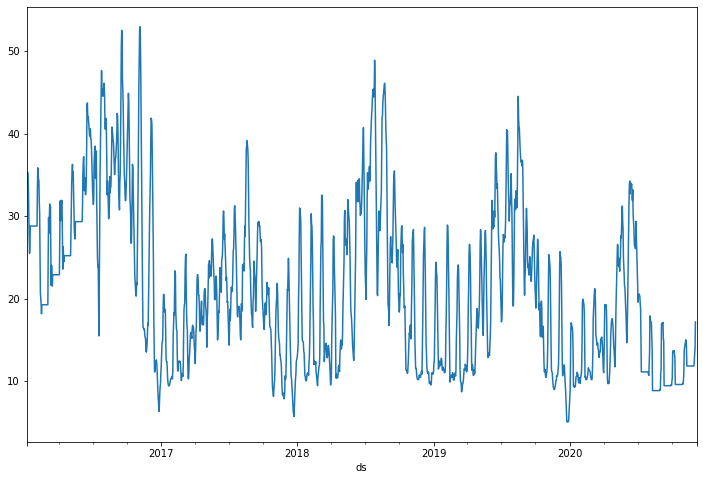

In [32]:
# Trend
result.trend[1:].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

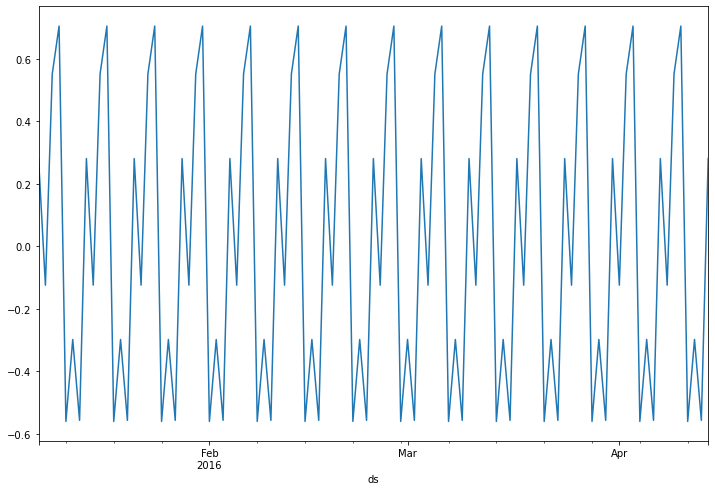

In [33]:
# Seasonal
result.seasonal[1:100].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

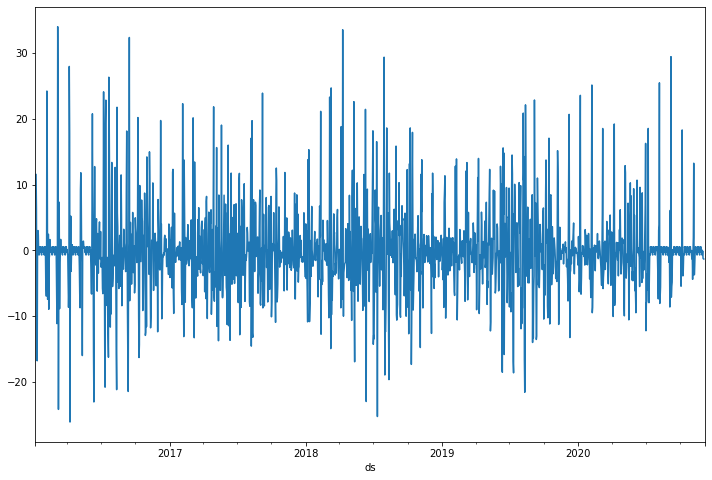

In [36]:
# Residual
result.resid[1:].plot(figsize=(12,8))

### Use the Prophet module

In [39]:
#!pip install prophet

In [23]:
usage = usage[['Date','Value (kWh)']]
usage.columns = ['ds','y']
usage.tail()

ds      y
35947 2020-07-07  1.307
35948 2020-07-07  2.872
35949 2020-07-07  2.138
35950 2020-07-07  2.199
35951 2020-07-07  1.809

In [41]:
from prophet import Prophet
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

# Fitting with default parameters
usage_model_0 = Prophet(daily_seasonality=True)
usage_model_0.fit(usage)

14:43:06 - cmdstanpy - INFO - Chain [1] start processing
14:43:15 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
# Generate 20 data points and forecasts for future periods

future= usage_model_0.make_future_dataframe(periods=20, freq='d')
future.tail()

usage_model_0_data=usage_model_0.predict(future)
usage_model_0_data.tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1513 2020-12-22  0.238481   -0.803714    1.469539     0.238370     0.238481   
1514 2020-12-23  0.238252   -0.834825    1.335642     0.238029     0.238252   
1515 2020-12-24  0.238022   -0.730720    1.393906     0.237670     0.238051   
1516 2020-12-25  0.237792   -0.674168    1.428718     0.237339     0.237860   
1517 2020-12-26  0.237563   -0.813091    1.365718     0.236978     0.237704   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
1513        0.109682              0.109682              0.109682  0.475929   
1514        0.083530              0.083530              0.083530  0.475929   
1515        0.108314              0.108314              0.108314  0.475929   
1516        0.082092              0.082092              0.082092  0.475929   
1517        0.101933              0.101933              0.101933  0.475929   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
1513  ... -0.020092     -0.020092     -0.020092 -0.346155     -0.346155   
1514  ... -0.029333     -0.029333     -0.029333 -0.363066     -0.363066   
1515  ...  0.010567      0.010567      0.010567 -0.378182     -0.378182   
1516  ... -0.002715     -0.002715     -0.002715 -0.391122     -0.391122   
1517  ...  0.027566      0.027566      0.027566 -0.401562     -0.401562   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
1513     -0.346155                   0.0                         0.0   
1514     -0.363066                   0.0                         0.0   
1515     -0.378182                   0.0                         0.0   
1516     -0.391122                   0.0                         0.0   
1517     -0.401562                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
1513                         0.0  0.348163  
1514                         0.0  0.321781  
1515                         0.0  0.346336  
1516                         0.0  0.319884  
1517                         0.0  0.339495  

[5 rows x 22 columns]

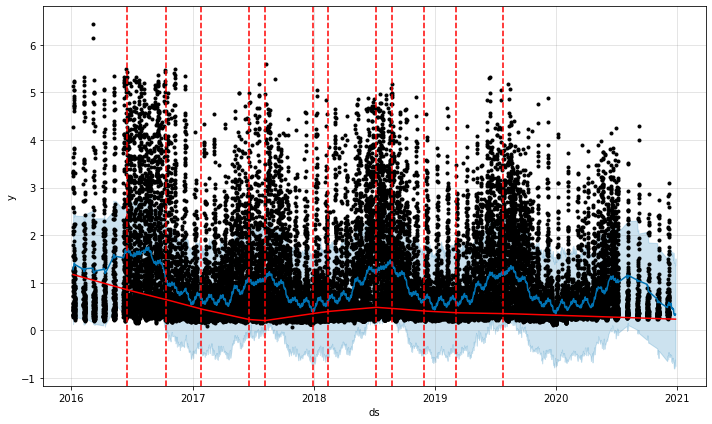

In [43]:
# Plot the graph to shows the trend, the tolerance band, and the dashed lines that partitions the time series into several time windows
from prophet.plot import add_changepoints_to_plot
forecast = usage_model_0.predict(future)
fig= usage_model_0.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), usage_model_0, forecast)

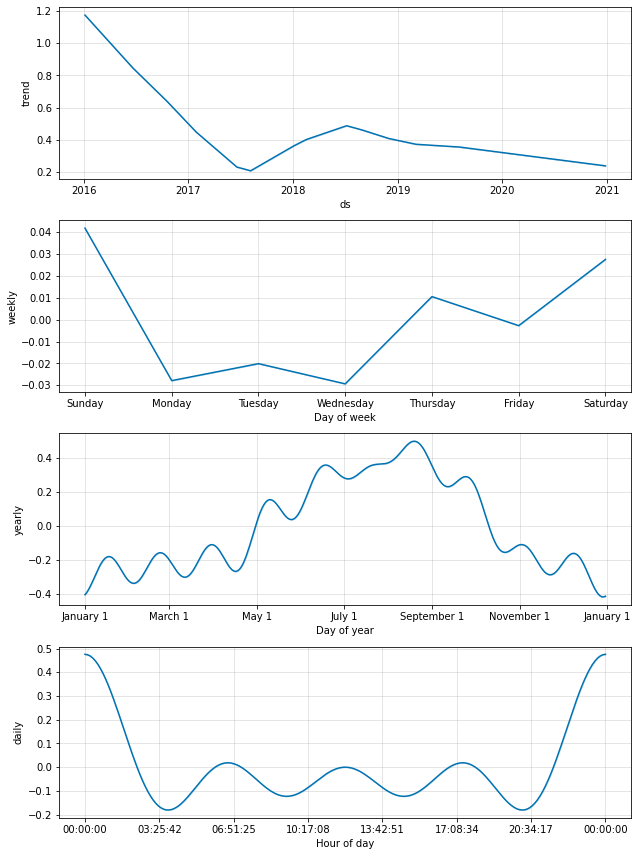

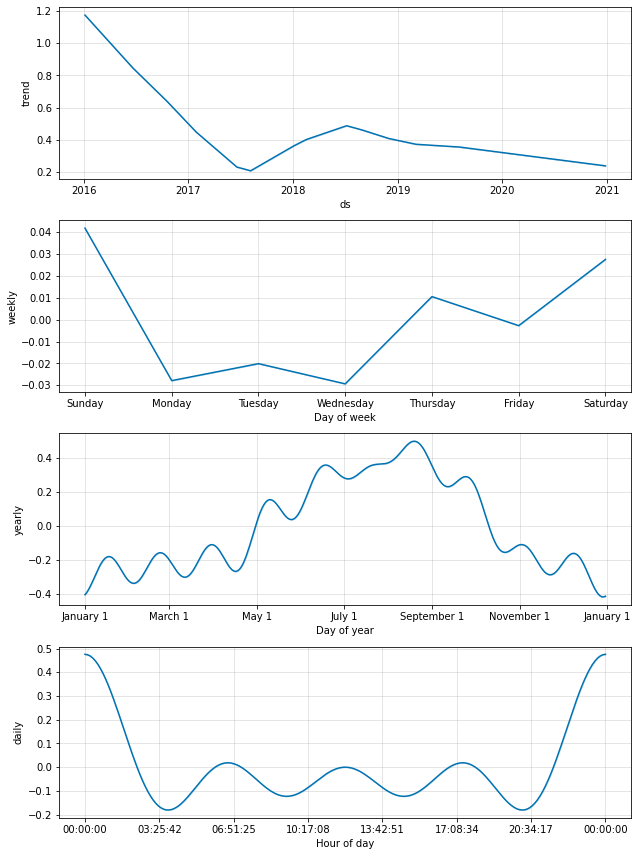

In [44]:
# Examine the “trend”, the “weekly” pattern, the “yearly” pattern and the “daily” pattern
usage_model_0.plot_components(usage_model_0_data)

### Conclusion

#### Simple Moving Average (SMA) ####

SMA is an arithmetic moving average calculated by adding values and then dividing that figure by the number of time periods in the calculation average.The SMA method smooths the rough edges in a time series to identify the pattern. It does not analyze and models the source of the patterns. 


#### Exponential Smoothing ####

It is similar to SMA in smoothing the rough edges in order to identify a pattern, but the Exponential Smoothing assigns exponentially decreasing weights as the observation gets older. In other words, recent data are given relatively more weight in forecasting than older data. Older the observation lesser the weight placed on it and newer the observations have higher weightage. This gives more importance to the recent and relevant data.In exponential smoothing, however, there are one or more smoothing parameters to be determined (or estimated) and these choices determine the weights assigned to the observations.




#### Seasonal Treanding Decomposition (STD) ####

STD is splits the time series signal into three parts: seasonal, trend, and residual, and is suitable for many time series that possess calendar patterns. This model assumes the three components are simply additive, meaning you can simply add them up to get back to the original time series (seasonal + trend + residual = the time series). Trends gives you a general direction of the overall data. Seasonality is a regular and predictable pattern that recur at a fixed interval of time. Randomness or Noise or Residual is the random fluctuation or unpredictable change. This technique gives the algorithm automatically searches for the periodical patterns and identify the change in pattern over various seasons and historically. 

#### The Prophet Module ####

The prophet module is open-sourced by Facebook.com for forecasting time series data. The model assumes a general additive model (GAM) that a time series can be specified with the following components: y(t) = g(t) + s(t) + h(t) + ε(t)

- Trend: g(t)
- Seasonality:s(t) for weekly and yearly seasonality
- Holiday Effects: h(t) for the effects of holidays that occur on potentially irregular schedules over one or more days 
- ε(t) : for any idiosyncratic changes which are not accommodated by the model.The predictor is t or time. 

If the above functions g(t), s(t), and h(t) are linear, the model becomes a Seasonal-Trend Decomposition model. That’s why the GAM provides more flexibility than the STD model. It means the trend or seasonality pattern can contribute to the predicted values y(y) in any functional form. Therefore, If a time series can be formulated by the time such as year, season, month, or week, the prophet module is a good choice. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.